In [1]:
import pandas as pd

df = pd.read_excel("data/online_retail.xlsx")
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'data/online_retail.xlsx'

In [1]:
import pandas as pd

df = pd.read_excel("data/online_retail.xlsx")
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [2]:
# Remove cancelled invoices (those starting with 'C')
df = df[~df['Invoice'].astype(str).str.startswith('C')]

# Keep only valid quantities and prices
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

# Drop rows missing important fields
df.dropna(subset=['Description', 'Country'], inplace=True)


In [3]:
df['Revenue'] = df['Quantity'] * df['Price']
df[['Quantity', 'Price', 'Revenue']].head()


,Quantity,Price,Revenue
0,12,6.95,83.4
1,12,6.75,81.0
2,12,6.75,81.0
3,48,2.10,100.8
4,24,1.25,30.0


In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')


In [5]:
monthly_revenue = (
    df.groupby('MonthYear')['Revenue']
      .sum()
      .reset_index()
      .sort_values('MonthYear')
)

monthly_revenue.head()


,MonthYear,Revenue
0,2009-12,825685.760
1,2010-01,652708.502
2,2010-02,553339.736
3,2010-03,833570.131
4,2010-04,681528.992


In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')

monthly_revenue = (
    df.groupby('MonthYear')['Revenue']
      .sum()
      .reset_index()
      .sort_values('MonthYear')
)

monthly_revenue.head()


,MonthYear,Revenue
0,2009-12,825685.760
1,2010-01,652708.502
2,2010-02,553339.736
3,2010-03,833570.131
4,2010-04,681528.992


In [7]:
top_products = (
    df.groupby('Description')['Revenue']
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

top_products


,Description,Revenue
0,Manual,262618.51
1,REGENCY CAKESTAND 3 TIER,170078.51
2,WHITE HANGING HEART T-LIGHT HOLDER,160630.78
3,DOTCOM POSTAGE,116408.71
4,ASSORTED COLOUR BIRD ORNAMENT,73092.99
5,PAPER CHAIN KIT 50'S CHRISTMAS,58189.25
6,JUMBO BAG RED RETROSPOT,56595.51
7,PARTY BUNTING,49682.72
8,POSTAGE,49477.54
9,ROTATING SILVER ANGELS T-LIGHT HLDR,47985.09


In [8]:
country_revenue = (
    df.groupby('Country')['Revenue']
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

country_revenue


,Country,Revenue
0,United Kingdom,8845755.693
1,EIRE,380977.820
2,Netherlands,268786.000
3,Germany,202395.321
4,France,147211.490
5,Sweden,53525.390
6,Denmark,50906.850
7,Spain,47601.420
8,Switzerland,43921.390
9,Australia,31446.800


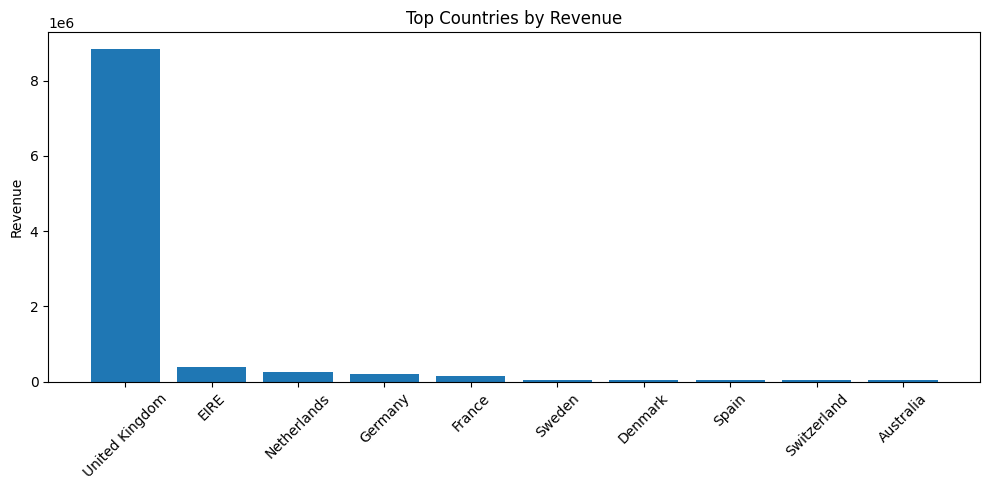

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(country_revenue['Country'], country_revenue['Revenue'])
plt.xticks(rotation=45)
plt.title('Top Countries by Revenue')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()


In [10]:
df['Month'] = df['InvoiceDate'].dt.month_name()

seasonality = (
    df.groupby('Month')['Revenue']
      .sum()
      .reindex([
          'January','February','March','April','May','June',
          'July','August','September','October','November','December'
      ])
      .reset_index()
)

seasonality


,Month,Revenue
0,January,652708.502
1,February,553339.736
2,March,833570.131
3,April,681528.992
4,May,659858.860
5,June,752270.140
6,July,650712.940
7,August,697274.910
8,September,924333.011
9,October,1165483.910


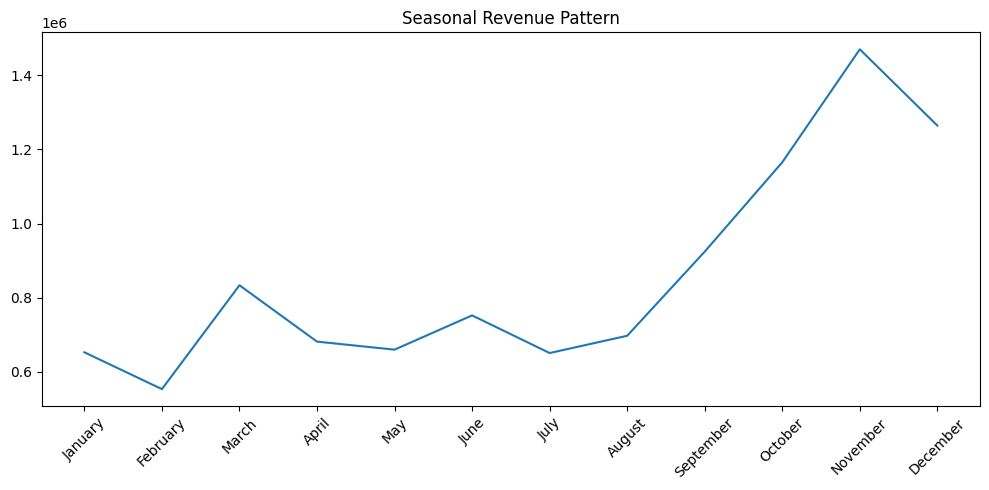

In [11]:
plt.figure(figsize=(10,5))
plt.plot(seasonality['Month'], seasonality['Revenue'])
plt.xticks(rotation=45)
plt.title('Seasonal Revenue Pattern')
plt.tight_layout()
plt.show()


In [1]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')

monthly_revenue = df.groupby('Month')['Revenue'].sum()

monthly_revenue.plot(
    title='Monthly Revenue Trend',
    figsize=(10,5)
)


NameError: name 'pd' is not defined

In [2]:
top_products = (
    df.groupby('Description')['Revenue']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

top_products.plot(
    kind='bar',
    title='Top 10 Products by Revenue',
    figsize=(10,5)
)


NameError: name 'df' is not defined

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
from pathlib import Path

data_path = Path("data/online_retail.xlsx")

df = pd.read_excel(data_path)
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')

monthly_revenue = df.groupby('Month')['Revenue'].sum()

monthly_revenue.plot(
    title='Monthly Revenue Trend',
    figsize=(10,5)
)
plt.show()


In [6]:
df['Revenue'] = df['Quantity'] * df['Price']
df[['Quantity', 'Price', 'Revenue']].head()


,Quantity,Price,Revenue
0,12,6.95,83.4
1,12,6.75,81.0
2,12,6.75,81.0
3,48,2.10,100.8
4,24,1.25,30.0


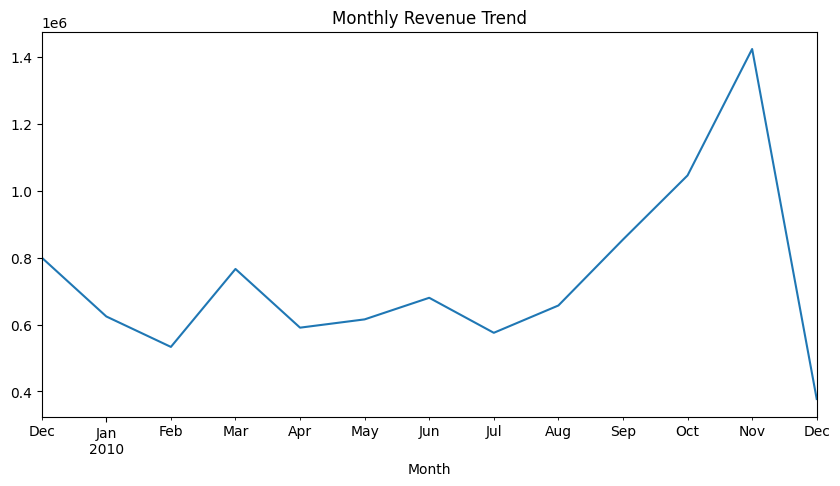

In [7]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')

monthly_revenue = df.groupby('Month')['Revenue'].sum()

monthly_revenue.plot(
    title='Monthly Revenue Trend',
    figsize=(10,5)
)
plt.show()


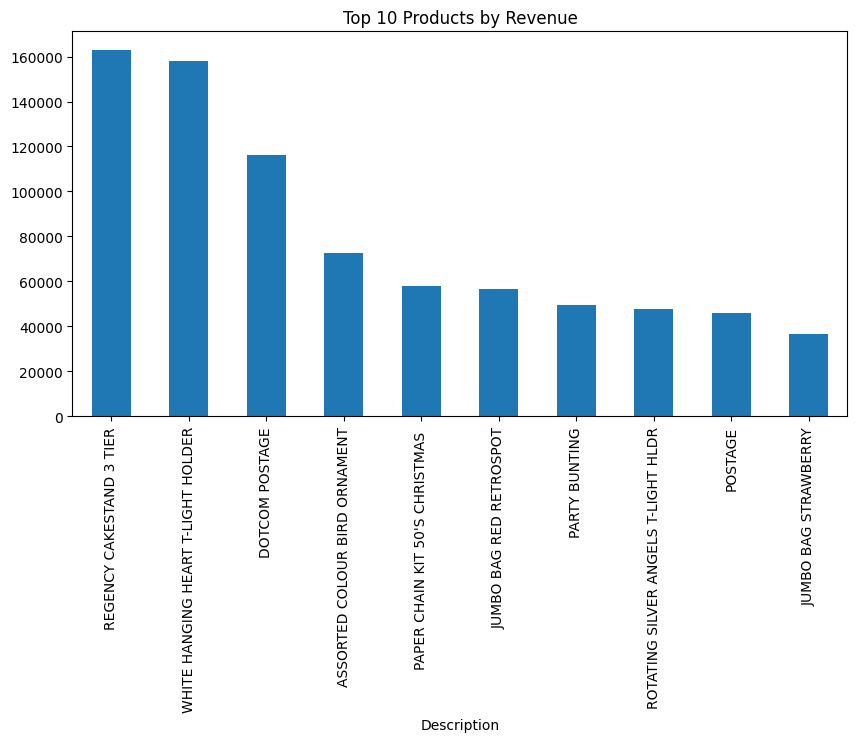

In [8]:
top_products = (
    df.groupby('Description')['Revenue']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

top_products.plot(
    kind='bar',
    title='Top 10 Products by Revenue',
    figsize=(10,5)
)
plt.show()


In [10]:
country_revenue = (
    df.groupby('Country')['Revenue']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

country_revenue


Country
United Kingdom    8194777.533
EIRE               352242.730
Netherlands        263863.410
Germany            196290.351
France             130769.900
Sweden              51213.510
Denmark             46972.950
Switzerland         43343.410
Spain               37084.900
Australia           30051.800
Name: Revenue, dtype: float64

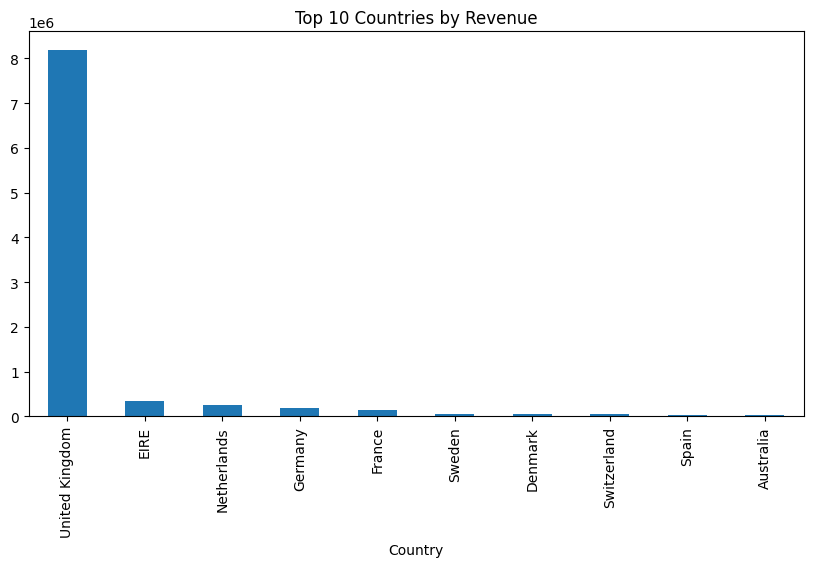

In [11]:
country_revenue.plot(
    kind='bar',
    title='Top 10 Countries by Revenue',
    figsize=(10,5)
)
plt.show()


In [12]:
## Revenue by Country – Insight

- The United Kingdom generates the highest revenue by a large margin.
- A small number of countries contribute most of the total sales.
- This suggests the business is highly concentrated geographically.


SyntaxError: invalid syntax (2855839274.py, line 3)

## Revenue by Country – Insight

- The United Kingdom generates the highest revenue by a large margin.
- A small number of countries contribute most of the total sales.
- This suggests the business is highly concentrated geographically.


In [14]:
df['Revenue'] = df['Quantity'] * df['Price']


In [15]:
top_customers = (
    df.groupby('Customer ID')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_customers


Customer ID
18102.0    341776.73
14646.0    243853.05
14156.0    183180.55
14911.0    137675.91
13694.0    128172.42
17511.0     83760.60
15061.0     82162.74
16684.0     75610.17
13089.0     55828.31
16754.0     54558.18
Name: Revenue, dtype: float64

<Axes: title={'center': 'Top 10 Customers by Revenue'}, xlabel='Customer ID'>

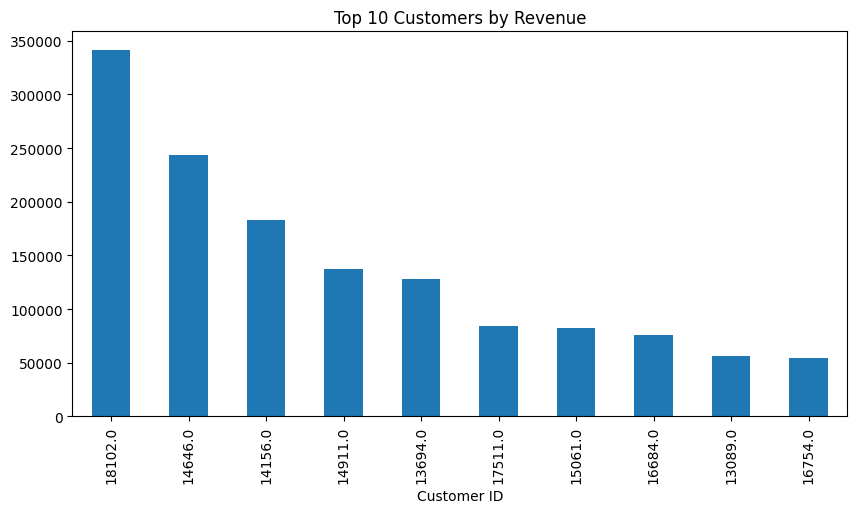

In [18]:
top_customers.plot(
    kind='bar',
    title='Top 10 Customers by Revenue',
    figsize=(10,5)
)


## Top Customers – Insight

- A small number of customers contribute a large share of total revenue.
- The business is highly dependent on high-value customers.
- Retaining these customers should be a top priority.


In [19]:
revenue_by_country = (
    df.groupby('Country')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

revenue_by_country


Country
United Kingdom    8194777.533
EIRE               352242.730
Netherlands        263863.410
Germany            196290.351
France             130769.900
Sweden              51213.510
Denmark             46972.950
Switzerland         43343.410
Spain               37084.900
Australia           30051.800
Name: Revenue, dtype: float64

<Axes: title={'center': 'Top 10 Countries by Revenue'}, xlabel='Country'>

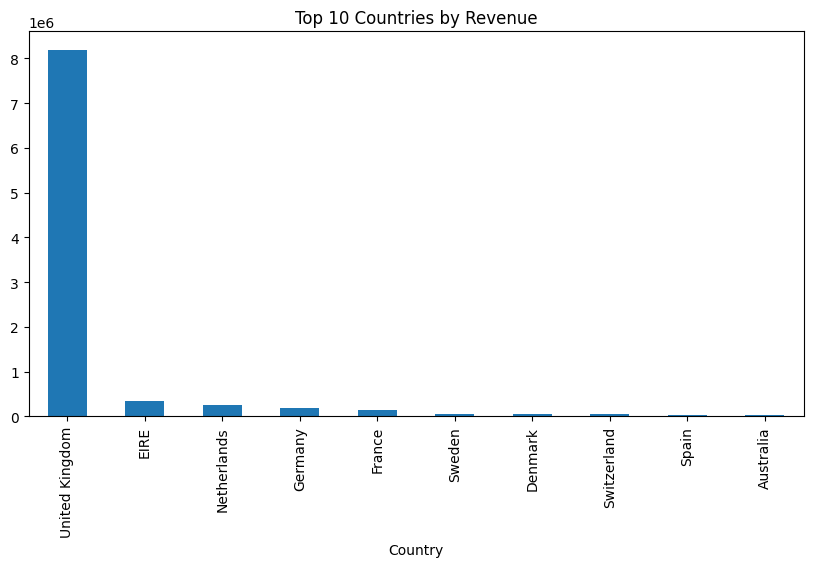

In [20]:
revenue_by_country.plot(
    kind='bar',
    title='Top 10 Countries by Revenue',
    figsize=(10,5)
)


## Revenue by Country – Insight

- The United Kingdom generates the highest revenue by a large margin.
- A small number of countries contribute most of the total sales.
- This indicates strong geographic concentration of revenue.


## Sales Seasonality – Insight

- Revenue shows clear seasonality with peaks toward the end of the year.
- Sales increase significantly in November and December.
- This suggests strong holiday-driven purchasing behavior.
